
##  **Most Important Techniques for Classification **

## 1. Skewness check for numerical features
## 2. Chi-Square test (for categorical features vs Fraud_Label)
## 3. ANOVA F-test (numerical features vs target)
## 4. Variance Threshold (low variance features)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import chi2, f_classif, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

warnings.filterwarnings("ignore")

In [2]:
file = pd.read_csv("/content/drive/MyDrive/task/CreditCardFraudDetection/synthetic_fraud_dataset.csv")



In [3]:
file.head(5)

,Unnamed: 0,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [4]:
# remove unwanted columns
file.drop(["Unnamed: 0","Transaction_ID","User_ID"], axis =1, inplace = True)
file.shape

(50000, 19)

In [5]:
#info
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  object 
 2   Timestamp                     50000 non-null  object 
 3   Account_Balance               50000 non-null  float64
 4   Device_Type                   50000 non-null  object 
 5   Location                      50000 non-null  object 
 6   Merchant_Category             50000 non-null  object 
 7   IP_Address_Flag               50000 non-null  int64  
 8   Previous_Fraudulent_Activity  50000 non-null  int64  
 9   Daily_Transaction_Count       50000 non-null  int64  
 10  Avg_Transaction_Amount_7d     50000 non-null  float64
 11  Failed_Transaction_Count_7d   50000 non-null  int64  
 12  Card_Type                     50000 non-null  object 
 13  C

In [6]:
# Null value
file.isnull().sum()


,0
Transaction_Amount,0
Transaction_Type,0
Timestamp,0
Account_Balance,0
Device_Type,0
Location,0
Merchant_Category,0
IP_Address_Flag,0
Previous_Fraudulent_Activity,0
Daily_Transaction_Count,0


In [7]:
# Duplicate inspection
file.duplicated().sum()

np.int64(0)

In [8]:
file.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [9]:
file["Fraud_Label"].value_counts()

,count
Fraud_Label,
0,33933
1,16067


## EDA

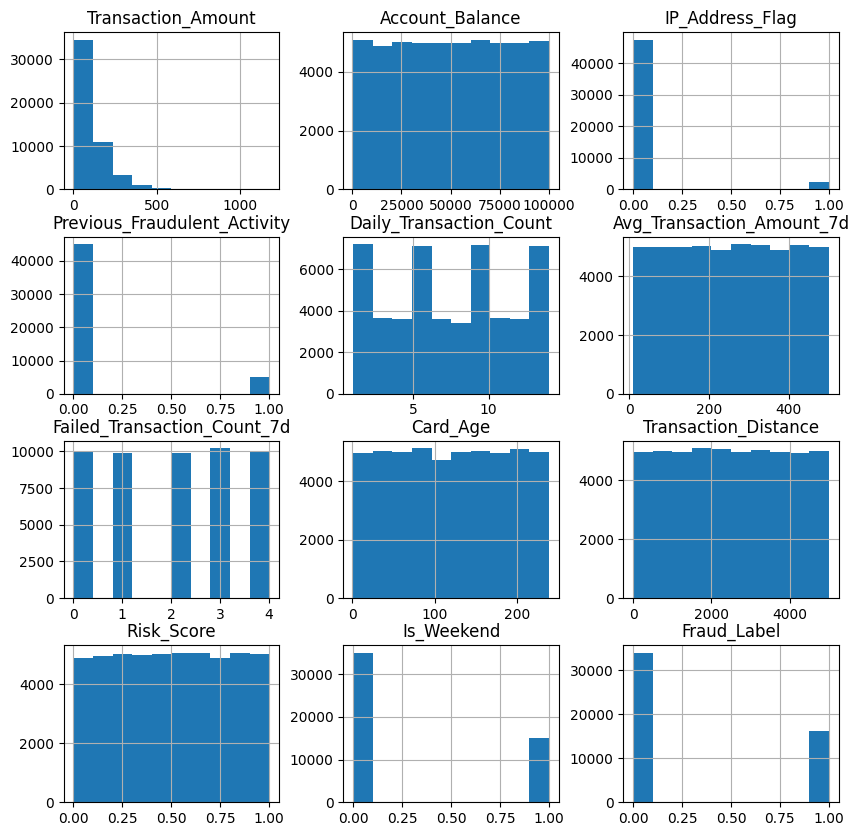

In [10]:
file.hist(figsize=(10,10))
plt.show()

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  object 
 2   Timestamp                     50000 non-null  object 
 3   Account_Balance               50000 non-null  float64
 4   Device_Type                   50000 non-null  object 
 5   Location                      50000 non-null  object 
 6   Merchant_Category             50000 non-null  object 
 7   IP_Address_Flag               50000 non-null  int64  
 8   Previous_Fraudulent_Activity  50000 non-null  int64  
 9   Daily_Transaction_Count       50000 non-null  int64  
 10  Avg_Transaction_Amount_7d     50000 non-null  float64
 11  Failed_Transaction_Count_7d   50000 non-null  int64  
 12  Card_Type                     50000 non-null  object 
 13  C

In [12]:
file["Device_Type"].value_counts()


,count
Device_Type,
Tablet,16779
Mobile,16640
Laptop,16581


In [13]:
file["Location"].value_counts()


,count
Location,
Tokyo,10208
Mumbai,9994
London,9945
Sydney,9938
New York,9915


In [14]:
file["Merchant_Category"].value_counts()


,count
Merchant_Category,
Clothing,10033
Groceries,10019
Travel,10015
Restaurants,9976
Electronics,9957


In [15]:

file["Authentication_Method"].value_counts()

,count
Authentication_Method,
Biometric,12591
PIN,12586
Password,12457
OTP,12366


In [16]:
file["Card_Type"].value_counts()

,count
Card_Type,
Mastercard,12693
Visa,12560
Amex,12419
Discover,12328


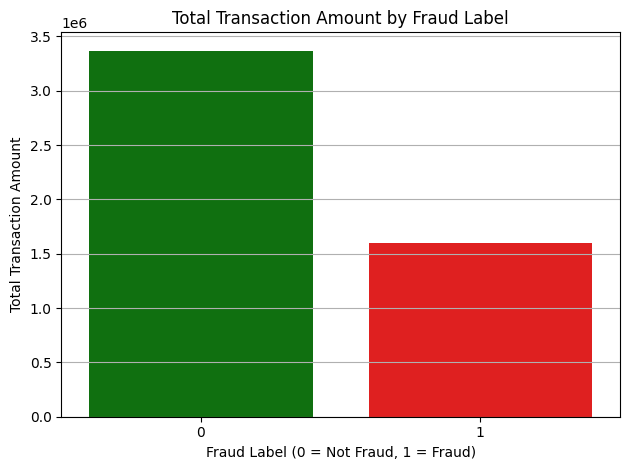

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
fraud_amount = file.groupby("Fraud_Label")["Transaction_Amount"].sum().reset_index()

# Plot
sns.barplot(x="Fraud_Label", y="Transaction_Amount", data=fraud_amount, palette=["green", "red"])
plt.title("Total Transaction Amount by Fraud Label")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Total Transaction Amount")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


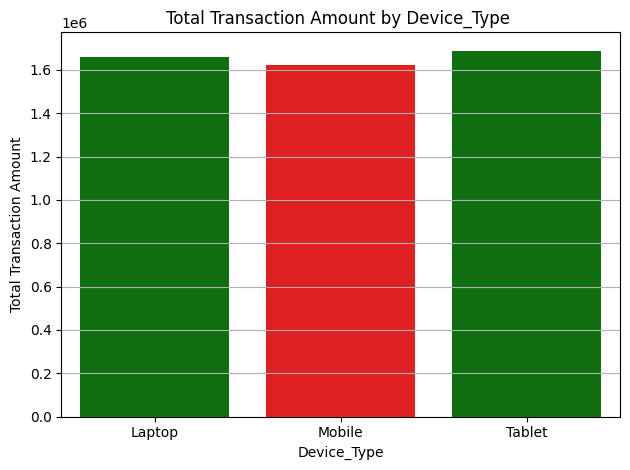

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
fraud_amount = file.groupby("Device_Type")["Transaction_Amount"].sum().reset_index()

# Plot
sns.barplot(x="Device_Type", y="Transaction_Amount", data=fraud_amount, palette=["green", "red"])
plt.title("Total Transaction Amount by Device_Type ")
plt.xlabel("Device_Type")
plt.ylabel("Total Transaction Amount")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


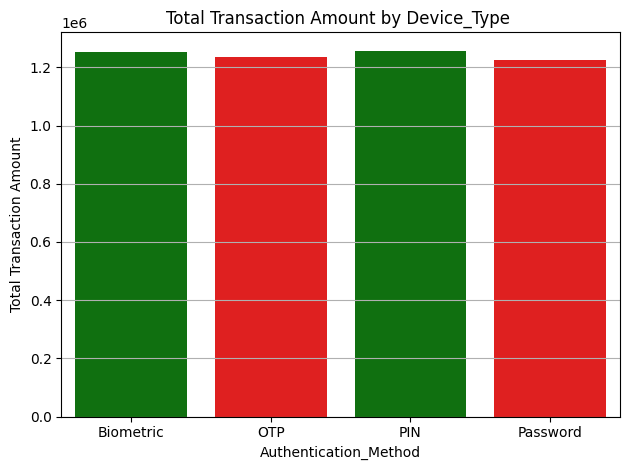

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
fraud_amount = file.groupby("Authentication_Method")["Transaction_Amount"].sum().reset_index()

# Plot
sns.barplot(x="Authentication_Method", y="Transaction_Amount", data=fraud_amount, palette=["green", "red"])
plt.title("Total Transaction Amount by Device_Type ")
plt.xlabel("Authentication_Method")
plt.ylabel("Total Transaction Amount")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [20]:
grouped_data = file.groupby([ 'Transaction_Type',  'Authentication_Method','Fraud_Label']).size().reset_index(name='Transaction_Count')
grouped_data

,Transaction_Type,Authentication_Method,Fraud_Label,Transaction_Count
0,ATM Withdrawal,Biometric,0,2129
1,ATM Withdrawal,Biometric,1,1017
2,ATM Withdrawal,OTP,0,2026
3,ATM Withdrawal,OTP,1,1030
4,ATM Withdrawal,PIN,0,2109
5,ATM Withdrawal,PIN,1,977
6,ATM Withdrawal,Password,0,2143
7,ATM Withdrawal,Password,1,1022
8,Bank Transfer,Biometric,0,2064
9,Bank Transfer,Biometric,1,977


In [21]:
file.head(2)

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1


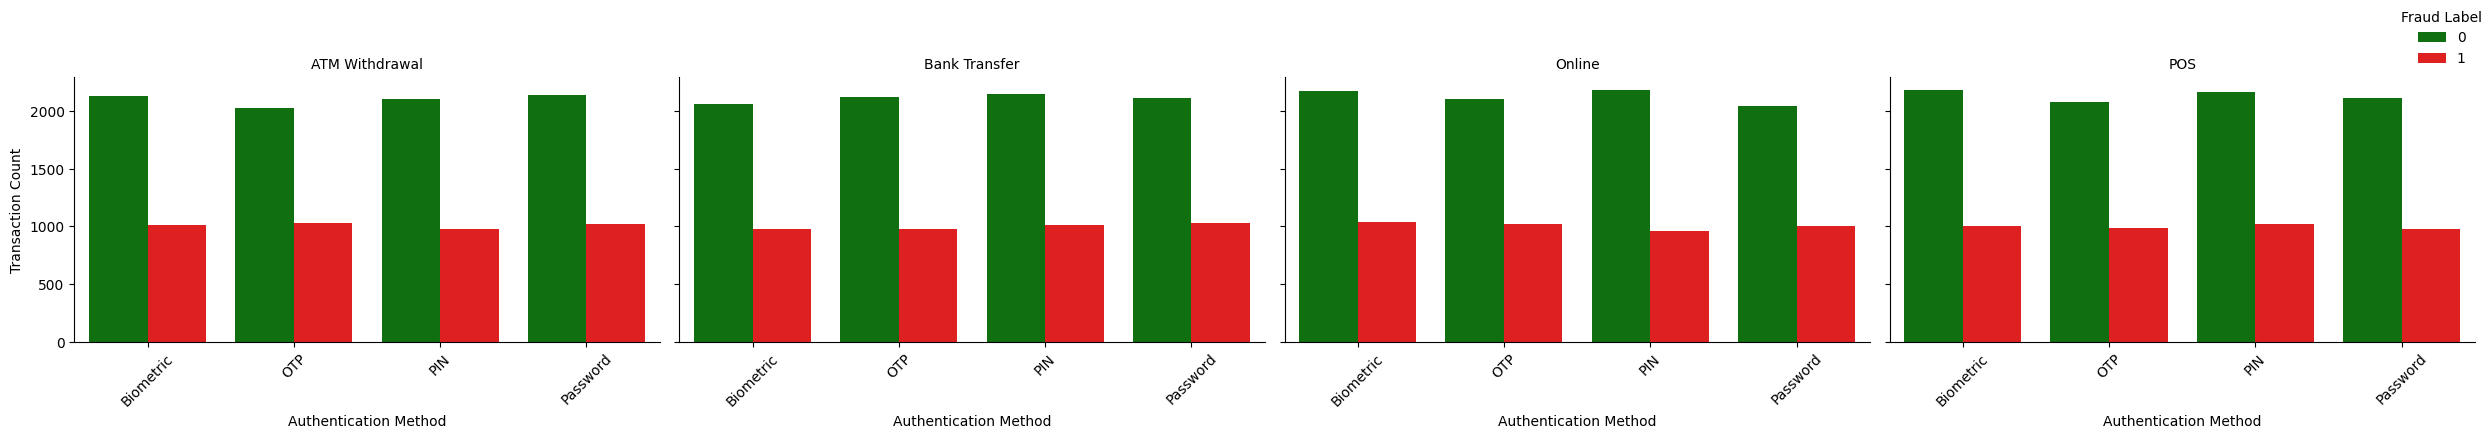

In [22]:
g = sns.catplot(
    data=grouped_data,
    x='Authentication_Method',
    y='Transaction_Count',
    hue='Fraud_Label',
    col='Transaction_Type',
    kind='bar',
    palette={0: 'green', 1: 'red'},
    height=4,
    aspect=1.5
)

g.set_titles("{col_name}")
g.set_axis_labels("Authentication Method", "Transaction Count")
g.set_xticklabels(rotation=45)
g._legend.set_title("Fraud Label")
g._legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.show()


In [23]:
df =file.copy()

target ='Fraud_Label'

numerical_features = df.select_dtypes(include=['int', 'float64']).columns.drop(target)
categorical_features = df.select_dtypes(include = ['object', "category"]).columns

df[numerical_features].skew().sort_values(ascending =False)

,0
IP_Address_Flag,4.119975
Previous_Fraudulent_Activity,2.696697
Transaction_Amount,1.996036
Is_Weekend,0.874769
Transaction_Distance,0.006449
Daily_Transaction_Count,0.003684
Card_Age,0.000512
Avg_Transaction_Amount_7d,-0.000909
Risk_Score,-0.001319
Account_Balance,-0.003025


In [24]:

# Load your DataFrame
df = file.copy()  # or use pd.read_csv(...) if not already loaded

target = 'Fraud_Label'

# Step 1: Identify feature types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# ----------------------------------------------------
# 1. Skewness check for numerical features
print(" Skewness of numerical features:")
skewness = df[numerical_features].skew().sort_values(ascending=False)
print(skewness)

# ----------------------------------------------------
# 2. Chi-Square test (for categorical features vs Fraud_Label)
le = LabelEncoder()
df_encoded = df[categorical_features].apply(le.fit_transform)

chi_scores, p_values = chi2(df_encoded, df[target])

chi2_df = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\n Chi-Square Test Results (Categorical vs Fraud_Label):")
print(chi2_df)

# ----------------------------------------------------
# 3. ANOVA F-test (numerical features vs target)
f_scores, f_pvalues = f_classif(df[numerical_features], df[target])

anova_df = pd.DataFrame({
    'Feature': numerical_features,
    'F_Score': f_scores,
    'P_Value': f_pvalues
}).sort_values(by='F_Score', ascending=False)

print("\n ANOVA F-Test Results (Numerical vs Fraud_Label):")
print(anova_df)

# ----------------------------------------------------
# 4. Variance Threshold (low variance features)
selector = VarianceThreshold(threshold=0.01)  # you can tune this threshold
selector.fit(df[numerical_features])

low_variance_features = numerical_features[~selector.get_support()]
print("\n Low Variance Features to Consider Dropping:")
print(low_variance_features.tolist())


🔍 Skewness of numerical features:
IP_Address_Flag                 4.119975
Previous_Fraudulent_Activity    2.696697
Transaction_Amount              1.996036
Is_Weekend                      0.874769
Transaction_Distance            0.006449
Daily_Transaction_Count         0.003684
Card_Age                        0.000512
Avg_Transaction_Amount_7d      -0.000909
Risk_Score                     -0.001319
Account_Balance                -0.003025
Failed_Transaction_Count_7d    -0.008803
dtype: float64

✅ Chi-Square Test Results (Categorical vs Fraud_Label):
                 Feature  Chi2_Score       P_Value
1              Timestamp  217.505988  3.165228e-49
4      Merchant_Category    1.646283  1.994655e-01
5              Card_Type    1.176929  2.779821e-01
3               Location    1.096082  2.951276e-01
2            Device_Type    0.957374  3.278494e-01
0       Transaction_Type    0.876357  3.492014e-01
6  Authentication_Method    0.001110  9.734236e-01

✅ ANOVA F-Test Results (Numerical 

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import FunctionTransformer

# Step 1: Log transform the skewed features
skewed_features = ['IP_Address_Flag', 'Transaction_Amount', 'Previous_Fraudulent_Activity']
for col in skewed_features:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p handles zero safely

# Step 2: Extract features from Timestamp (convert if needed)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')  # fix if not datetime
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Step 3: Select final features
selected_features = [
    'Failed_Transaction_Count_7d',
    'Risk_Score',
    'IP_Address_Flag_log',
    'Transaction_Amount_log',
    'Previous_Fraudulent_Activity_log',
    'Hour',
    'DayOfWeek'
]

# Target
X = df[selected_features]
y = df['Fraud_Label']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Confusion Matrix:
[[6765    0]
 [   0 3235]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6765
           1       1.00      1.00      1.00      3235

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

